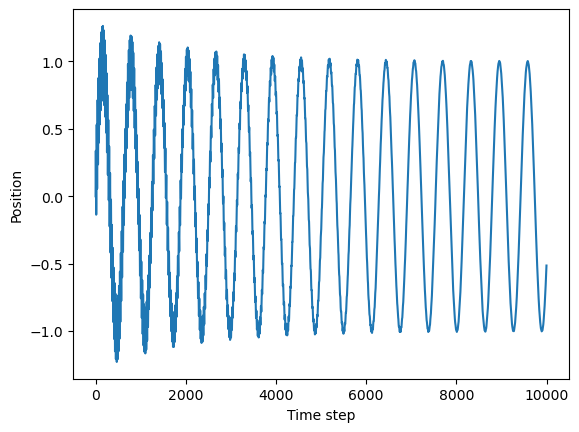

In [53]:
# Create a Mass-Spring Model with pymunk 
import pymunk
import pymunk.matplotlib_util
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

# Initialize space
space = pymunk.Space()
space.gravity = (0, 0)  # gravity in the downward direction

# Create mass
mass = 1  # mass of 1 kg
radius = 10  # radius of the mass
moment = pymunk.moment_for_circle(mass, 0, radius)  # moment of inertia for the mass
body = pymunk.Body(mass, moment)  # create the body
body.position = (0, 0)  # position the body at the origin
shape = pymunk.Circle(body, radius)  # create the shape
space.add(body, shape)  # add the body and shape to the space

# Create spring
spring_anchor = (0, 100)  # position of the spring anchor
spring = pymunk.DampedSpring(body, space.static_body, (0, 0), spring_anchor, 100, 1000, 0.1)
space.add(spring)  # add the spring to the space

# Create force to move the mass
force = (0, 1000)  # force to apply to the mass
body.apply_force_at_local_point(force, body.position)  # apply the force to the mass

# List to store positions
positions = []

# Simulation loop
T = 10000  # total time to simulate (msec)
for i in range(T):
    # 
    force = (0, 1000*np.sin(100*i/T))  # force to apply to the mass
    body.apply_force_at_local_point(force, body.position)
    space.step(0.01)  # step the space forward in time
    positions.append(body.position.y)  # store the y position

# Plot the position over time
plt.plot(positions)
plt.xlabel('Time step')
plt.ylabel('Position')
plt.show()

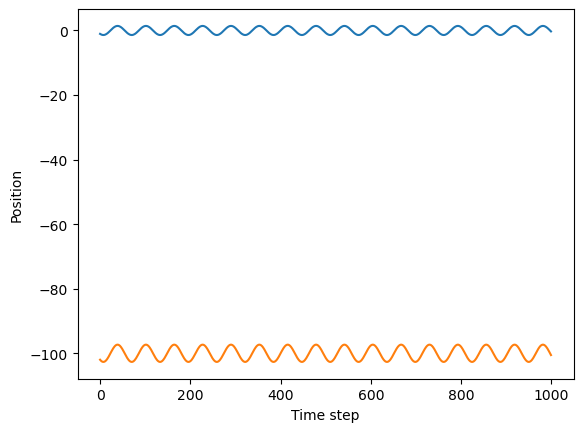

In [48]:
import pymunk
import matplotlib.pyplot as plt
import numpy as np 
# Initialize space
space = pymunk.Space()
# space.gravity = (0, -10)  # gravity in the downward direction

# Create first mass
mass1 = 1  # mass of 1 kg
radius1 = 10  # radius of the mass
moment1 = pymunk.moment_for_circle(mass1, 0, radius1)  # moment of inertia for the mass
body1 = pymunk.Body(mass1, moment1)  # create the body
body1.position = (0, 0)  # position the body at the origin
shape1 = pymunk.Circle(body1, radius1)  # create the shape
space.add(body1, shape1)  # add the body and shape to the space

# Create second mass
mass2 = 1  # mass of 1 kg
radius2 = 10  # radius of the mass
moment2 = pymunk.moment_for_circle(mass2, 0, radius2)  # moment of inertia for the mass
body2 = pymunk.Body(mass2, moment2)  # create the body
body2.position = (0, -100)  # position the body below the first mass
shape2 = pymunk.Circle(body2, radius2)  # create the shape
space.add(body2, shape2)  # add the body and shape to the space

# Create first spring
spring_anchor1 = (0, 100)  # position of the spring anchor
spring1 = pymunk.DampedSpring(body1, space.static_body, (0, 0), spring_anchor1, 100, 1000, 0.1)
space.add(spring1)  # add the spring to the space

# Create second spring
spring2 = pymunk.DampedSpring(body1, body2, (0, 0), (0, 0), 100, 1000, 0.1)
space.add(spring2)  # add the spring to the space

# 
pos1 = []
pos2 = []

# Simulation loop
for i in range(100000):
    # 
    force = (0, 1000*np.sin(100*i/1000))  # force to apply to the mass
    body2.apply_force_at_local_point(force, body2.position)
    space.step(0.01)  
    
    pos1 += [body1.position.y]
    pos2 += [body2.position.y]
    
# Plot the position over time
plt.plot(pos1[-1000:])
plt.plot(pos2[-1000:])
plt.xlabel('Time step')
plt.ylabel('Position')
plt.show()